In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.plot import show
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point
import cmocean
from pyproj import Transformer
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
from scipy.interpolate import griddata
import utm
import cmocean.cm as cmo

C:\Users\15093\anaconda3\envs\gpgn-318\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
List of points on Line

CC2435009_20250517_173457
CC2435009_20250517_173251
CC2435009_20250517_173059
CC2435009_20250517_172848
CC2435009_20250517_173933
CC2435009_20250517_172732
CC2435009_20250517_172628
CC2435009_20250517_172425
CC2435009_20250517_172030
CC2435009_20250517_171815
CC2435009_20250517_171326

SyntaxError: invalid syntax (3956001546.py, line 1)

In [4]:
tif_harding = rasterio.open('2good harding cove_modified.tif')

# dataframe for new dataframe (see judes total_df notebook for addition of polygon location/measurement type and fins big_df notebook for all collected data)
total_df = pd.read_csv('total_df.csv')

# make dataframe for all of keystone measuremnts 
HAR_Full = total_df[total_df['Area'] == 'HAR']
# convert to from UTC to datetime to sort by date
HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
#KEY_Full
# make dataframe of keystone from the 18th
HAR_17 = HAR_Full[HAR_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-17').date()]

#xarray = KEY_18.to_xarray()

utm_coords = [
    utm.from_latlon(lat, lon)
    for lat, lon in zip(HAR_17['Latitude'], HAR_17['Longitude'])
]

HAR_17['Easting']  = [c[0] for c in utm_coords]
HAR_17['Northing'] = [c[1] for c in utm_coords]

HAR_17

C:\Users\15093\AppData\Local\Temp\ipykernel_11844\2198339265.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
C:\Users\15093\AppData\Local\Temp\ipykernel_11844\2198339265.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HAR_17['Easting']  = [c[0] for c in utm_coords]
C:\Users\15093\AppData\Local\Temp\ipykernel_11844\2198339265.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Unnamed: 0  Pressure (dbar)  Depth (m)  Temperature (°C)  \
1928        1928         0.150000   0.153172         11.061896   
1929        1929         0.450000   0.458883         11.023812   
1930        1930         0.750000   0.764803         10.986801   
1931        1931         1.050000   1.070721         10.860266   
1932        1932         1.350000   1.376634         10.761063   
...          ...              ...        ...               ...   
2208        2208         2.550000   2.600261         10.647005   
2209        2209         2.850000   2.906168         10.622163   
2210        2210         3.150000   3.212074         10.611571   
2211        2211         3.450000   3.517979         10.607002   
2212        2212         3.807249   3.882260         10.591853   

      Conductivity (µS/cm)  Specific Conductance (µS/cm)  Salinity (PSS)  \
1928            313.363922                    434.480649        0.206302   
1929            313.264091                    434.801418        0.206434   
1930            311.284568                    432.498255        0.205289   
1931            311.241828                    433.964749        0.205923   
1932            310.336380                    433.902621        0.205830   
...                    ...                           ...             ...   
2208            307.701478                    431.595139        0.204631   
2209            307.511077                    431.628871        0.204630   
2210            307.433204                    431.647910        0.204632   
2211            307.380883                    431.629831        0.204619   
2212            307.418586                    431.866509        0.204723   

      Sound Velocity (m/s)  Density (kg/m³)   Latitude   Longitude  \
1928           1451.702039       999.763844  40.284984 -106.853796   
1929           1451.559730       999.769273  40.284984 -106.853796   
1930           1451.419841       999.773572  40.284984 -106.853796   
1931           1450.934636       999.788258  40.284984 -106.853796   
1932           1450.553453       999.799471  40.284984 -106.853796   
...                    ...              ...        ...         ...   
2208           1450.126337       999.815420  40.286394 -106.854360   
2209           1450.034087       999.819261  40.286394 -106.854360   
2210           1449.997495       999.821717  40.286394 -106.854360   
2211           1449.984421       999.823578  40.286394 -106.854360   
2212           1449.931035       999.826826  40.286394 -106.854360   

                UTC Time                  File Name Area        Easting  \
1928 2025-05-17 17:10:19  CC2435009_20250517_171019  HAR  342415.724635   
1929 2025-05-17 17:10:19  CC2435009_20250517_171019  HAR  342415.724635   
1930 2025-05-17 17:10:19  CC2435009_20250517_171019  HAR  342415.724635   
1931 2025-05-17 17:10:19  CC2435009_20250517_171019  HAR  342415.724635   
1932 2025-05-17 17:10:19  CC2435009_20250517_171019  HAR  342415.724635   
...                  ...                        ...  ...            ...   
2208 2025-05-17 17:47:52  CC2435009_20250517_174752  HAR  342371.045730   
2209 2025-05-17 17:47:52  CC2435009_20250517_174752  HAR  342371.045730   
2210 2025-05-17 17:47:52  CC2435009_20250517_174752  HAR  342371.045730   
2211 2025-05-17 17:47:52  CC2435009_20250517_174752  HAR  342371.045730   
2212 2025-05-17 17:47:52  CC2435009_20250517_174752  HAR  342371.045730   

          Northing  
1928  4.461037e+06  
1929  4.461037e+06  
1930  4.461037e+06  
1931  4.461037e+06  
1932  4.461037e+06  
...            ...  
2208  4.461195e+06  
2209  4.461195e+06  
2210  4.461195e+06  
2211  4.461195e+06  
2212  4.461195e+06  

[285 rows x 16 columns]

In [5]:
target_files = [
    "CC2435009_20250517_173457",
    "CC2435009_20250517_173251",
    "CC2435009_20250517_173059",
    "CC2435009_20250517_172848",
    "CC2435009_20250517_173933",
    "CC2435009_20250517_172732",
    "CC2435009_20250517_172628",
    "CC2435009_20250517_172425",
    "CC2435009_20250517_172030",
    "CC2435009_20250517_171815",
    "CC2435009_20250517_171326"
]

HAR_filt = HAR_17[HAR_17['File Name'].isin(target_files)].copy()

In [6]:
mins = HAR_17.min()

maxs = HAR_17.max()

print(mins)
print(maxs)

Unnamed: 0                                           1928
Pressure (dbar)                                      0.15
Depth (m)                                        0.153168
Temperature (°C)                                 7.250725
Conductivity (µS/cm)                           285.643494
Specific Conductance (µS/cm)                   402.902963
Salinity (PSS)                                   0.191016
Sound Velocity (m/s)                          1436.431956
Density (kg/m³)                                999.720582
Latitude                                        40.284984
Longitude                                     -106.857697
UTC Time                              2025-05-17 17:10:19
File Name                       CC2435009_20250517_171019
Area                                                  HAR
Easting                                     342090.471029
Northing                                   4461037.150467
dtype: object
Unnamed: 0                                           2212


In [7]:
coeffs = np.polyfit(HAR_filt['Longitude'], HAR_filt['Latitude'], 1)

slope, intercept = coeffs

In [8]:
m = slope     
b = intercept

x = np.linspace(-106.857697,-106.8536, 200) 
y = m * x + b

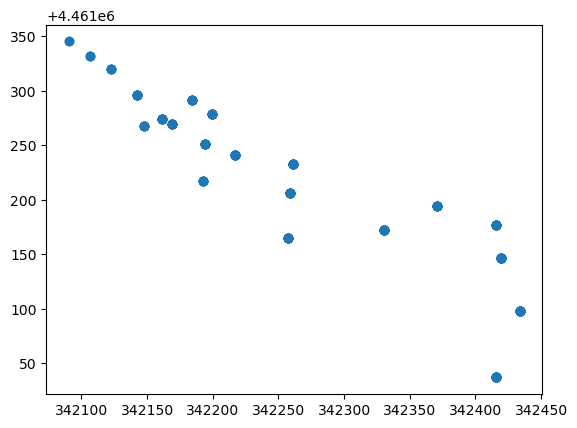

In [9]:
plt.scatter(HAR_17['Easting'], HAR_17['Northing'])

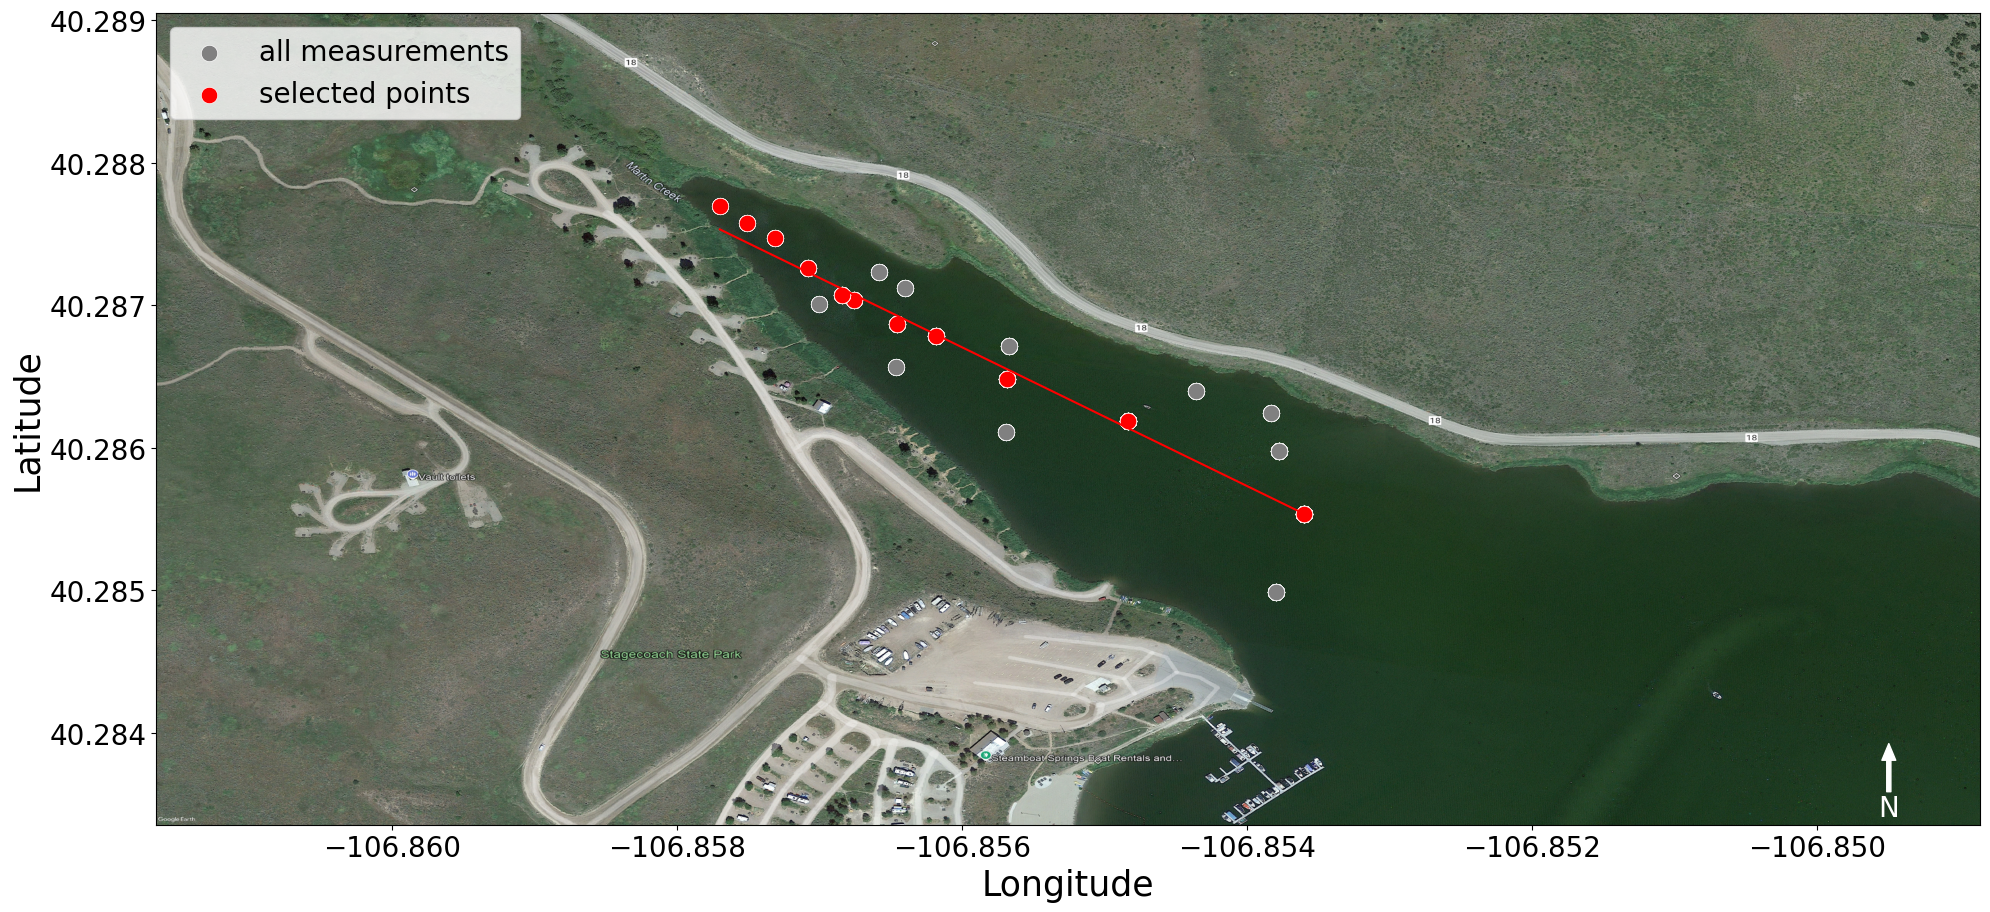

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

show(tif_harding, ax=ax)

sc1 = ax.scatter(
    HAR_17['Longitude'],
    HAR_17['Latitude'],
    s=140,
    facecolor='gray',
    edgecolor='white',
    linewidth=0.5,
    label='all measurements'
)

sc2 = ax.scatter(
    HAR_filt['Longitude'],
    HAR_filt['Latitude'],
    s=140,
    facecolor='red',
    edgecolor='white',
    linewidth=0.5,
    label='selected points'
)


ax.legend(fontsize=20, loc='upper left')

divider = make_axes_locatable(ax)

ax.set_xlabel('Longitude', fontsize=25)
ax.set_ylabel('Latitude', fontsize=25)

ax.tick_params(axis='both', which='major', labelsize=20)

# north arrow
ax.annotate(
    'N',
    xy=(0.95, 0.10),
    xytext=(0.95, 0.02),
    arrowprops=dict(
        facecolor='white',
        edgecolor='white',
        width=3,
        headwidth=10
    ),
    color='white',
    ha='center',
    va='center',
    fontsize=20,
    xycoords='axes fraction'
)
plt.plot(x,y,color='red')

ax.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax.xaxis.get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.tight_layout()
plt.show()

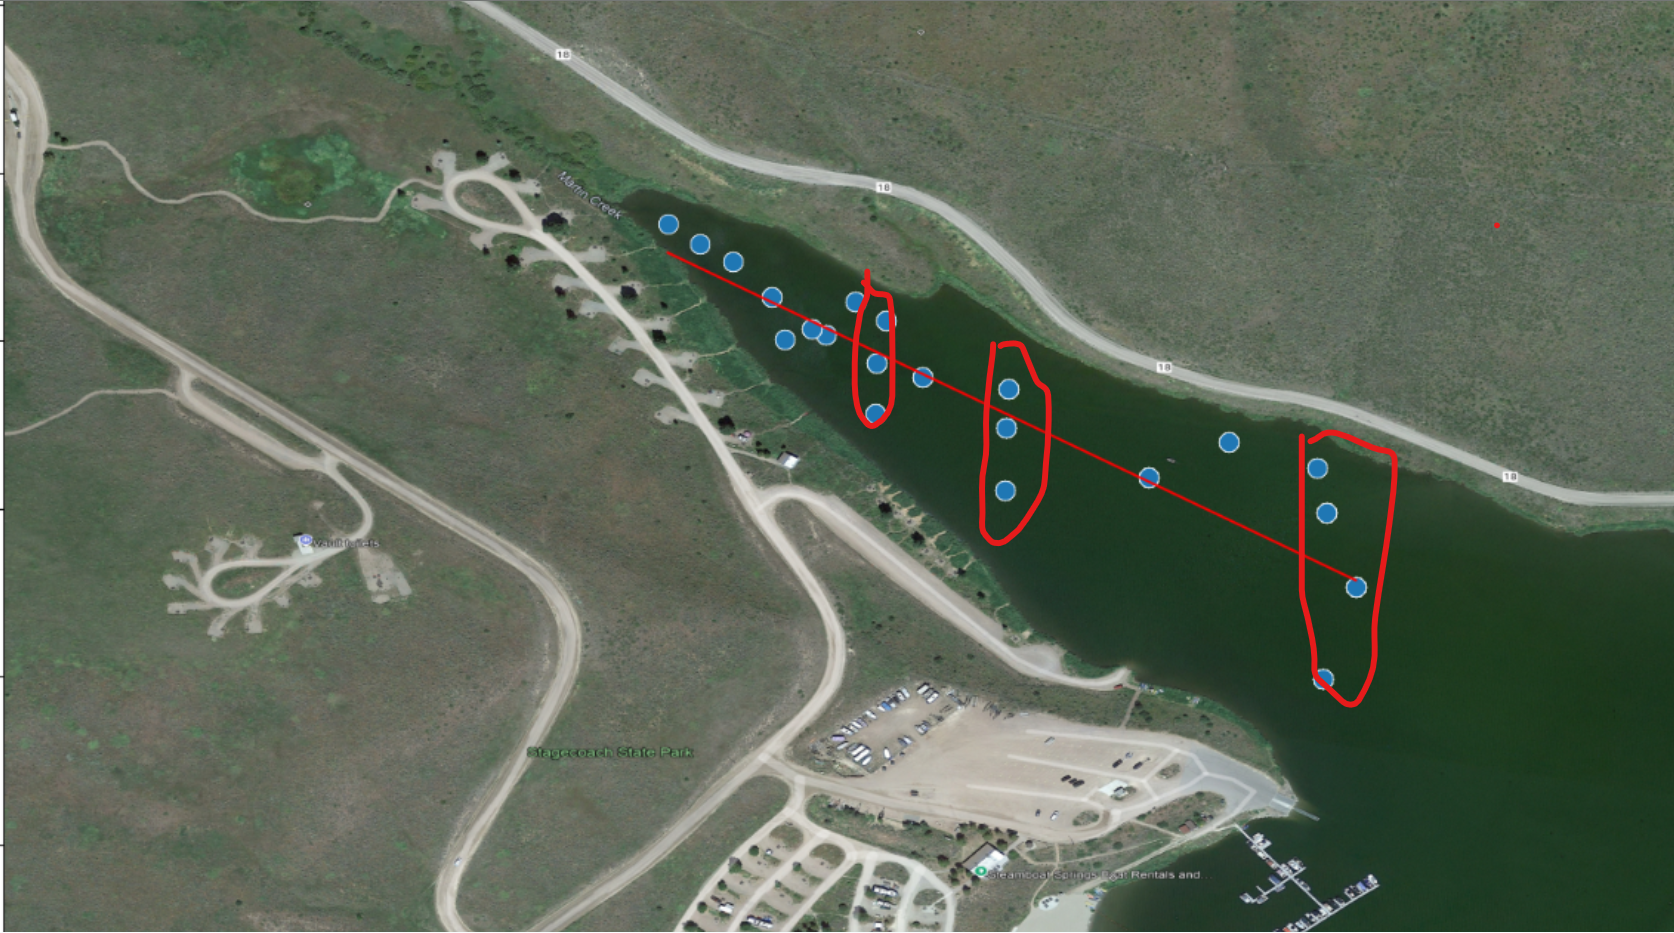

Make those three profiles and then one with just points near transcet once we have both create groups

## Make CTD Transect

# FULL

In [11]:
# find unique casts from keystone on the 18th
casts = HAR_17[['File Name', 'Easting', 'Northing']].drop_duplicates().reset_index(drop=True)

# find best fit line for transect with easting and northing
m, b = np.polyfit(casts['Easting'], casts['Northing'], 1)
# unit direction vector along that line
v = np.array([1.0, m])
v_unit = v / np.linalg.norm(v)
# choose a reference point on the line (when Easting=0 → Northing=b)
p0 = np.array([0.0, b])

# Project each cast onto the line:
# s_i = (p_i - p0) ⋅ v_unit   → distance along line in meters
XY = casts[['Easting', 'Northing']].to_numpy()
s_m = (XY - p0) @ v_unit
casts['distance_m'] = s_m - s_m.min()

HAR_df = HAR_17.merge(casts[['File Name', 'distance_m']], on='File Name')

In [12]:
dist_grid  = np.linspace(HAR_df.distance_m.min(), HAR_df.distance_m.max(), 300)
depth_grid = np.linspace(0, HAR_df['Depth (m)'].max(),                300)
D, Z = np.meshgrid(dist_grid, depth_grid)

# interpolate temperature
points = np.vstack((HAR_df.distance_m, HAR_df['Depth (m)'])).T
T = griddata(points, HAR_df['Temperature (°C)'], (D, Z), method='linear', fill_value=np.nan)

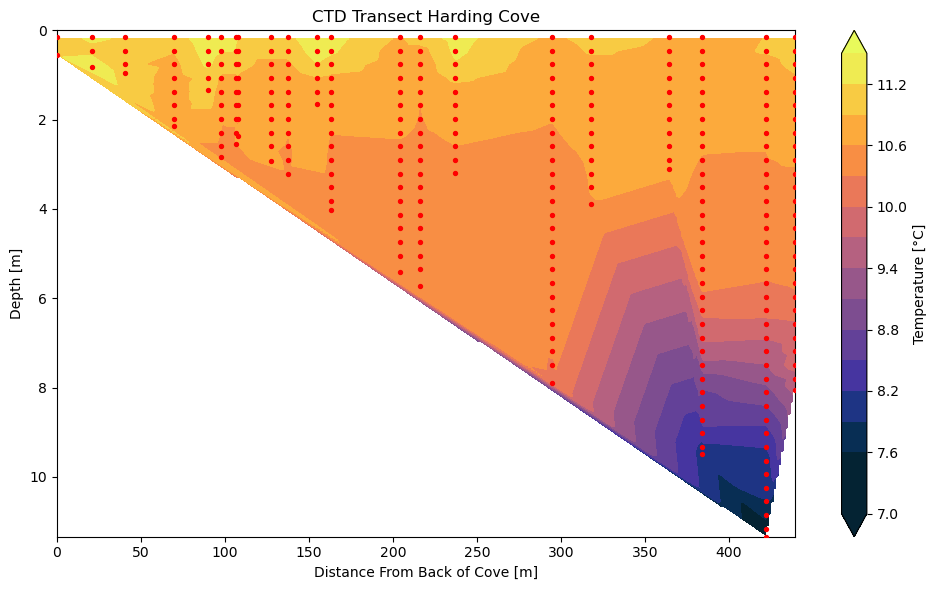

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
levels = np.arange(7, 11.51, 0.3)
cf = ax.contourf(D, Z, T, levels=levels, extend='both', vmin=7.5, vmax=11.5, cmap=cmo.thermal)
ax.scatter(HAR_df.distance_m, HAR_df['Depth (m)'], s=8, c='red', zorder=4)
ax.invert_yaxis()
ax.set_xlabel('Distance From Back of Cove [m]')
ax.set_ylabel('Depth [m]')
ax.set_title('CTD Transect Harding Cove')
fig.colorbar(cf, ax=ax, label='Temperature [°C]')
plt.tight_layout()
plt.show()


# FILT

In [14]:
# find unique casts from keystone on the 18th
casts = HAR_filt[['File Name', 'Easting', 'Northing']].drop_duplicates().reset_index(drop=True)

# find best fit line for transect with easting and northing
m, b = np.polyfit(casts['Easting'], casts['Northing'], 1)
# unit direction vector along that line
v = np.array([1.0, m])
v_unit = v / np.linalg.norm(v)
# choose a reference point on the line (when Easting=0 → Northing=b)
p0 = np.array([0.0, b])

# Project each cast onto the line:
# s_i = (p_i - p0) ⋅ v_unit   → distance along line in meters
XY = casts[['Easting', 'Northing']].to_numpy()
s_m = (XY - p0) @ v_unit
casts['distance_m'] = s_m - s_m.min()

HAR_df = HAR_filt.merge(casts[['File Name', 'distance_m']], on='File Name')

In [15]:
dist_grid  = np.linspace(HAR_df.distance_m.min(), HAR_df.distance_m.max(), 300)
depth_grid = np.linspace(0, HAR_df['Depth (m)'].max(),                300)
D, Z = np.meshgrid(dist_grid, depth_grid)

# interpolate temperature
points = np.vstack((HAR_df.distance_m, HAR_df['Depth (m)'])).T
T = griddata(points, HAR_df['Temperature (°C)'], (D, Z), method='linear', fill_value=np.nan)

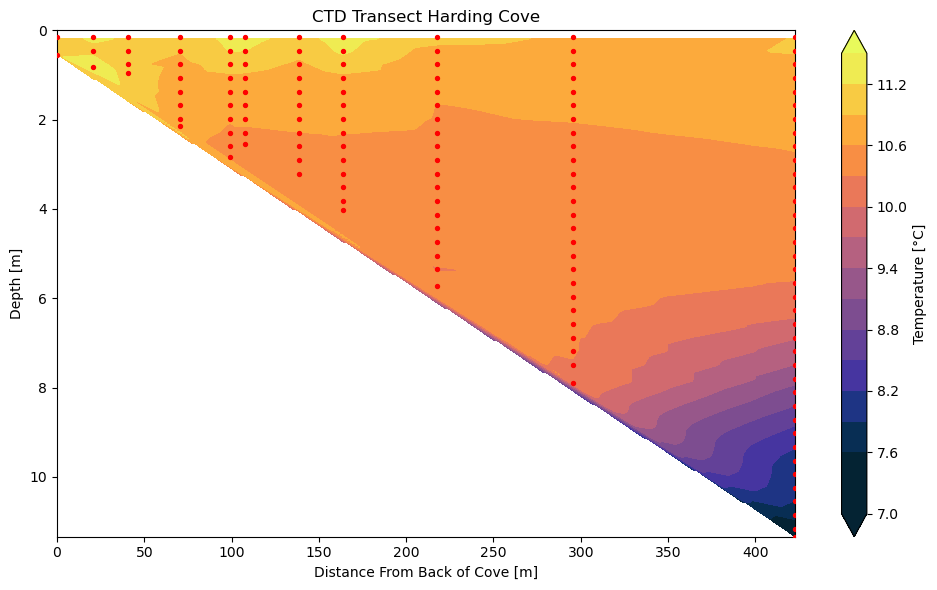

In [16]:
# plot
fig, ax = plt.subplots(figsize=(10, 6))
levels = np.arange(7, 11.51, 0.3)
cf = ax.contourf(D, Z, T, levels=levels, extend='both', vmin=7.5, vmax=11.5, cmap=cmo.thermal)
ax.scatter(HAR_df.distance_m, HAR_df['Depth (m)'], s=8, c='red', zorder=4)
ax.invert_yaxis()
ax.set_xlabel('Distance From Back of Cove [m]')
ax.set_ylabel('Depth [m]')
ax.set_title('CTD Transect Harding Cove')
fig.colorbar(cf, ax=ax, label='Temperature [°C]')
plt.tight_layout()
plt.show()


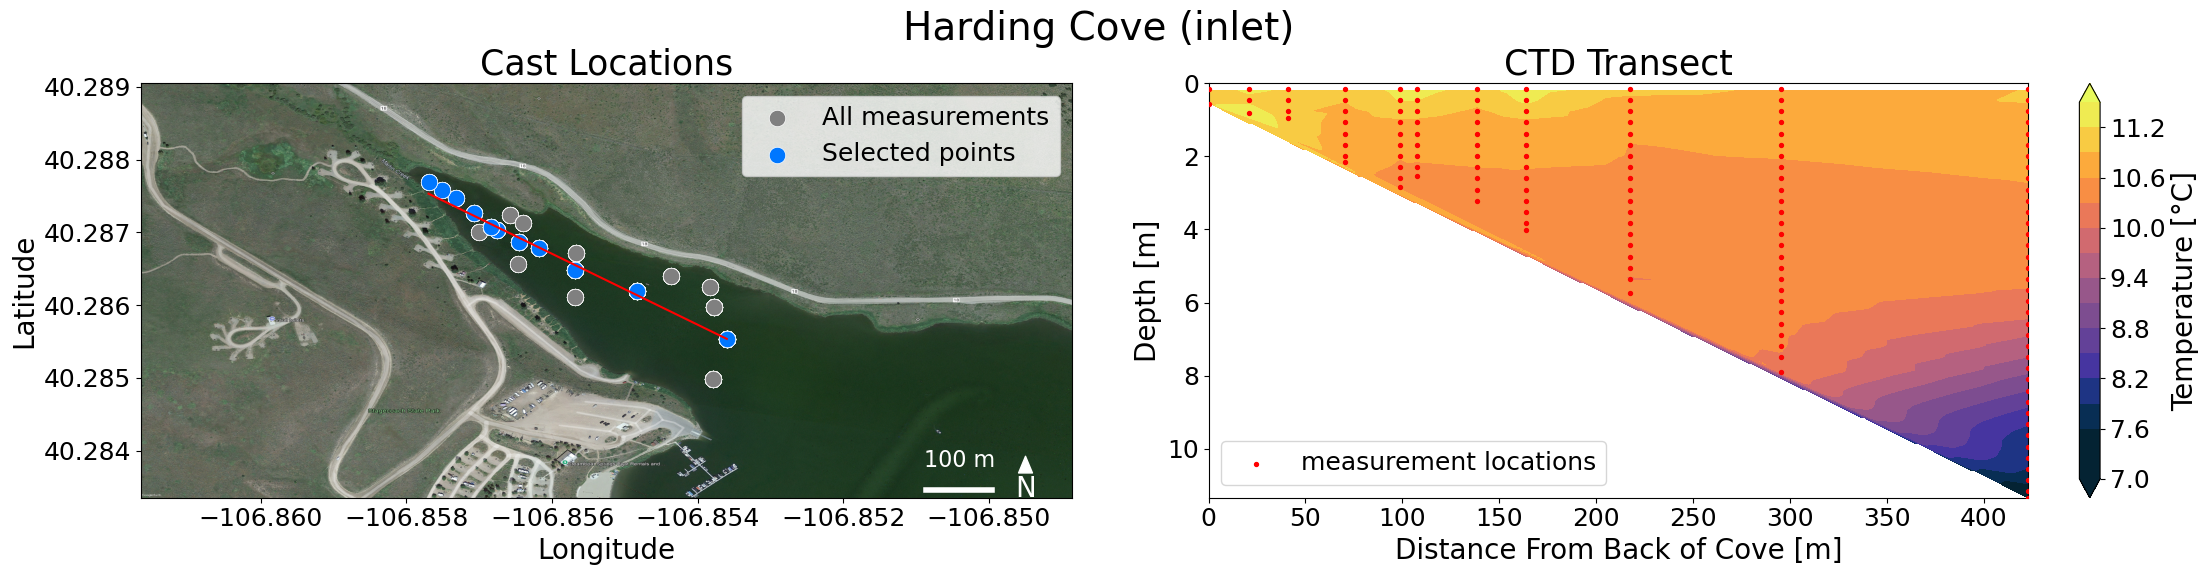

In [19]:
# --- Begin figure ---
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(23, 6))

# Plot 1: CTD transect
levels = np.arange(7, 11.51, 0.3)
cf = ax1.contourf(D, Z, T, levels=levels, extend='both', vmin=7.5, vmax=11.5, cmap=cmo.thermal)
ax1.scatter(HAR_df.distance_m, HAR_df['Depth (m)'], s=8, c='red', zorder=4, label = 'measurement locations')
ax1.invert_yaxis()
ax1.set_xlabel('Distance From Back of Cove [m]', fontsize=20)
ax1.set_ylabel('Depth [m]', fontsize=20)
ax1.set_title('CTD Transect', fontsize=25)
#ax1.legend(fontsize=12, loc='lower left')
ax1.legend(fontsize=18, loc='best')
ax1.tick_params(axis='both', labelsize=18)
cbar1 = fig.colorbar(cf, ax=ax1)
cbar1.ax.tick_params(labelsize=18)
cbar1.set_label('Temperature [°C]', fontsize=20)

# Plot 2: Map view
show(tif_harding, ax=ax2)

ax2.scatter(
    HAR_17['Longitude'], HAR_17['Latitude'],
    s=140, facecolor='grey', edgecolor='white', linewidth=0.5,
    label='All measurements'
)

ax2.scatter(
    HAR_filt['Longitude'], HAR_filt['Latitude'],
    s=140, facecolor='#0077FF', edgecolor='white', linewidth=0.5,
    label='Selected points'
)

# North arrow
ax2.annotate(
    'N', xy=(0.95, 0.10), xytext=(0.95, 0.02),
    arrowprops=dict(facecolor='white', edgecolor='white', width=3, headwidth=10),
    color='white', ha='center', va='center', fontsize=20,
    xycoords='axes fraction'
)
# 100 m scale bar (longitude degrees at ~40°N)
scale_deg = 0.000899  # ≈ 100 meters

# Get current axis limits
xlim = ax2.get_xlim()
ylim = ax2.get_ylim()

# Define scale bar position (bottom-right corner of map view)
x_start = xlim[1] - 0.002
x_end = x_start + scale_deg
y_pos = ylim[0] + 0.0001

# Draw scale bar
ax2.plot([x_start, x_end], [y_pos, y_pos], color='white', linewidth=4, zorder=10)

# Add "100 m" label above the scale bar
ax2.text((x_start + x_end) / 2, y_pos + 0.00025, '100 m',
         ha='center', va='bottom', fontsize=16, color='white', zorder=10)


# Optional line (x and y must be defined)
ax2.plot(x, y, color='red')


ax2.set_xlabel('Longitude', fontsize=20)
ax2.set_ylabel('Latitude', fontsize=20)
ax2.tick_params(axis='both', labelsize=18)
ax2.set_title('Cast Locations', fontsize=25)
ax2.legend(fontsize=18, loc='upper right')

ax2.xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax2.xaxis.get_major_formatter().set_useOffset(False)

ax2.yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=False))
ax2.yaxis.get_major_formatter().set_useOffset(False)
plt.suptitle("Harding Cove (inlet)", fontsize=28, y=.95)
plt.tight_layout()
plt.show()
